# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
on the coefficient of a linear model.

In this exercise, we will study the advantage of using some regularization
when dealing with correlated features.

We will first create a regression dataset. This dataset will contain 2,000
samples and 5 features from which only 2 features will be informative.

In [71]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000,
    n_features=5,
    n_informative=2,
    shuffle=False,
    coef=True,
    random_state=0,
    noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

Relevant feature #0     9.566665
Relevant feature #1    40.192077
Noisy feature #0        0.000000
Noisy feature #1        0.000000
Noisy feature #2        0.000000
dtype: float64

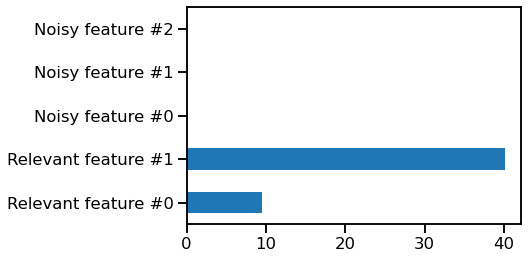

In [72]:
import pandas as pd

feature_names = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [73]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(data, target)

model_coef = pd.Series(lin_reg_model.coef_, index=feature_names)

df = pd.DataFrame([coef,model_coef]).T
df.columns = ['real_coef', 'model_coef']
df

,real_coef,model_coef
Relevant feature #0,9.566665,10.895870
Relevant feature #1,40.192077,40.411280
Noisy feature #0,0.000000,-0.205425
Noisy feature #1,0.000000,-0.189545
Noisy feature #2,0.000000,0.111298


Now, create a new dataset that will be the same as `data` with 4 additional
columns that will repeat twice features 0 and 1. This procedure will create
perfectly correlated features.

In [74]:
data_df = pd.DataFrame(data)
data_df[5] = data_df[0]
data_df[6] = data_df[0]
data_df[7] = data_df[1]
data_df[8] = data_df[1]

Fit again the linear regressor on this new dataset and check the
coefficients. What do you observe?

In [75]:
lin_reg_model_corr = LinearRegression()
lin_reg_model_corr.fit(data_df, target)

feature_names.extend(['feature #0b','feature #0c','feature #1b','feature #1c'])
corr_model_coef = pd.Series(lin_reg_model_corr.coef_, index=feature_names, name='corr_model_coef')
df = df.join(corr_model_coef, how='outer')
df

,real_coef,model_coef,corr_model_coef
Noisy feature #0,0.000000,-0.205425,-2.373047e-01
Noisy feature #1,0.000000,-0.189545,-1.879883e-01
Noisy feature #2,0.000000,0.111298,1.074219e-01
Relevant feature #0,9.566665,10.895870,9.128500e+11
Relevant feature #1,40.192077,40.411280,-1.658404e+14
feature #0b,NaN,NaN,-4.564250e+11
feature #0c,NaN,NaN,-4.564250e+11
feature #1b,NaN,NaN,8.292019e+13
feature #1c,NaN,NaN,8.292019e+13


Create a ridge regressor and fit on the same dataset. Check the coefficients.
What do you observe?

- Large coefficients that are very different from eachother for the same features

In [76]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(data_df, target)

ridge_coef = pd.Series(ridge_model.coef_, index=feature_names, name='ridge_model_coef')

df = df.join(ridge_coef, how='outer')
df

,real_coef,model_coef,corr_model_coef,ridge_model_coef
Noisy feature #0,0.000000,-0.205425,-2.373047e-01,-0.205493
Noisy feature #1,0.000000,-0.189545,-1.879883e-01,-0.189300
Noisy feature #2,0.000000,0.111298,1.074219e-01,0.111172
Relevant feature #0,9.566665,10.895870,9.128500e+11,3.631393
Relevant feature #1,40.192077,40.411280,-1.658404e+14,13.468021
feature #0b,NaN,NaN,-4.564250e+11,3.631393
feature #0c,NaN,NaN,-4.564250e+11,3.631393
feature #1b,NaN,NaN,8.292019e+13,13.468021
feature #1c,NaN,NaN,8.292019e+13,13.468021


Can you find the relationship between the ridge coefficients and the original
coefficients?

In [77]:
df.loc[['Relevant feature #0', 'feature #0b',
       'feature #0c', 'Relevant feature #1', 'feature #1b', 'feature #1c'], ['real_coef', 'ridge_model_coef']]

,real_coef,ridge_model_coef
Relevant feature #0,9.566665,3.631393
feature #0b,NaN,3.631393
feature #0c,NaN,3.631393
Relevant feature #1,40.192077,13.468021
feature #1b,NaN,13.468021
feature #1c,NaN,13.468021


for the ridge model the correlated features sum to the original coefficients i.e. they are divided amongst the 3 repeated columns

In [78]:
feat_0= df.loc[[rw for rw in df.index if '#0' in rw and not 'Noisy' in rw],  ['real_coef', 'ridge_model_coef']].sum()
feat_1= df.loc[[rw for rw in df.index if '#1' in rw and not 'Noisy' in rw],  ['real_coef', 'ridge_model_coef']].sum()
pd.DataFrame([feat_0, feat_1])

,real_coef,ridge_model_coef
0,9.566665,10.894180
1,40.192077,40.404063
